# MOGUL BANK DATA MANAGEMENT PROJECT

## Tasks:
1. Clean and split dataset into three tables
2. Save the new tables as CSV files
3. Write SQL codes RDMS creation and population as multiline string variiables
4. Provide meaningful insight about the data

### 1. IMPORT PACKAGES AND DATASET

In [1]:
"""
Import libraries for data manipulation and dataset using pd.read_csv.
"""

import pandas as pd
import numpy as np

import warnings
warnings.simplefilter("ignore")

marketing_df = pd.read_csv("./bank_marketing.csv")
pd.DataFrame(marketing_df)

,client_id,age,job,marital,education,credit_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,professional.course,no,yes,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,41185,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,41186,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### 2. EXPLORE MARKETING_DF
1. Get an overview of what the dataset looks like
2. Check column stats, 
3. Check for null and duplicate values

In [2]:
""" 
Visualizing the First 10 Rows of the DataFrame
Let's display the first 10 rows of the DataFrame to get a grasp of its structure and contents.
"""

marketing_df.head(10)

,client_id,age,job,marital,education,credit_default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,6,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,8,24,technician,single,professional.course,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,9,25,services,single,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
"""" Statistical Distribution Analysis
In this section, we explore the statistical distribution of the columns in our dataset. 
We'll compute descriptive statistics such as percentile, mean, median, mode and standard deviation. 
"""

marketing_df.describe()

,client_id,age,day,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20593.50000,40.02406,15.730334,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.42125,8.889867,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.00000,17.00000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10296.75000,32.00000,8.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20593.50000,38.00000,16.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30890.25000,47.00000,23.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41187.00000,98.00000,31.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
"""
Data Overview: Missing Values, Rows, Columns, and Column Data Types
Note: Some column data types will be changed later according to the data dictionary
"""
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41188 non-null  object 
 4   education       41188 non-null  object 
 5   credit_default  41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day             41188 non-null  int64  
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp_var_rate    41188 non-null  float64
 17  cons_price_idx  41188 non-null 

In [5]:
"""Check the number of missing values in each column of the marketing_df DataFrame
Note: There are no missing values
"""
marketing_df.isnull().sum()


client_id         0
age               0
job               0
marital           0
education         0
credit_default    0
housing           0
loan              0
contact           0
month             0
day               0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [6]:
"""
Lets check for duplicate values in the dataset
Note: There were no ducplicate values
"""
marketing_df.duplicated().sum()

0

### 3. SPLITING THE MARKETING_DF

1. The database to be created should contain three tables namely Client, Campaign, and economics hence, our CSV will 
splitted as such.
2. Some columns will be renamed as data dictonary
3. A few data types should be changed as well


In [7]:
"""
Lets define three separate data frames to store the split data 
client_df 
campaign_df  
econmoics_df 
"""

client_df = marketing_df[['client_id','age','job','marital','education','credit_default','housing','loan']]
campaign_df = marketing_df[['client_id','campaign','pdays','previous','poutcome','y','duration','month','day']]
economics_df = marketing_df[['client_id','emp_var_rate','cons_price_idx','euribor3m','nr_employed']]

In [8]:
#Let confirm all the columns properly are captured in the new client dataframes

client_df

,client_id,age,job,marital,education,credit_default,housing,loan
0,0,56,housemaid,married,basic.4y,no,no,no
1,1,57,services,married,high.school,unknown,no,no
2,2,37,services,married,high.school,no,yes,no
3,3,40,admin.,married,basic.6y,no,no,no
4,4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...,...
41183,41183,73,retired,married,professional.course,no,yes,no
41184,41184,46,blue-collar,married,professional.course,no,no,no
41185,41185,56,retired,married,university.degree,no,yes,no
41186,41186,44,technician,married,professional.course,no,no,no


In [9]:
#Let confirm all the columns properly are captured in the new campaign dataframes

campaign_df

,client_id,campaign,pdays,previous,poutcome,y,duration,month,day
0,0,1,999,0,nonexistent,no,261,may,13
1,1,1,999,0,nonexistent,no,149,may,19
2,2,1,999,0,nonexistent,no,226,may,23
3,3,1,999,0,nonexistent,no,151,may,27
4,4,1,999,0,nonexistent,no,307,may,3
...,...,...,...,...,...,...,...,...,...
41183,41183,1,999,0,nonexistent,yes,334,nov,30
41184,41184,1,999,0,nonexistent,no,383,nov,6
41185,41185,2,999,0,nonexistent,no,189,nov,24
41186,41186,1,999,0,nonexistent,yes,442,nov,17


In [10]:
#Let confirm all the columns properly are captured in the new economics dataframes

economics_df

,client_id,emp_var_rate,cons_price_idx,euribor3m,nr_employed
0,0,1.1,93.994,4.857,5191.0
1,1,1.1,93.994,4.857,5191.0
2,2,1.1,93.994,4.857,5191.0
3,3,1.1,93.994,4.857,5191.0
4,4,1.1,93.994,4.857,5191.0
...,...,...,...,...,...
41183,41183,-1.1,94.767,1.028,4963.6
41184,41184,-1.1,94.767,1.028,4963.6
41185,41185,-1.1,94.767,1.028,4963.6
41186,41186,-1.1,94.767,1.028,4963.6


### 4.REFORMATING AND CLEANING THE CLIENT_df

1. Rename column client_id to id
2. Remove every occurence of "." in the job column
3. Replace every occurence of "." in the education column and change to "_"
4. Change the credit_default, housing and loan columns to bool data types

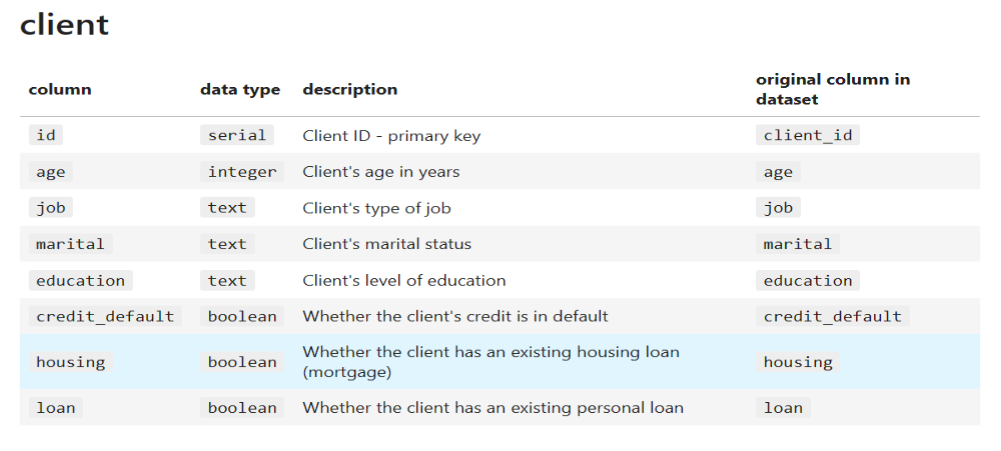

In [11]:
""" Remove "." in the job column  
This will change admin. to admin
"""

client_df['job'] = client_df['job'].str.replace('.', '')

In [12]:
# Rename the client_id column to id

client_df.rename(columns={'client_id': 'id'}, inplace=True)

In [13]:
# Replace "." with "_" in the education column

client_df['education'] = client_df['education'].str.replace('.', '_')

In [14]:
"""
Changing 'unknown' values to NumPy null (NaN) 
 some column originally contains'unknown', 'yes', and 'no'.
 For boolean columns, typically representing binary categories (e.g., yes/no, true/false, 1/0),
 Changing 'unknown' values to NaN as opposed to leaving them as a seperate category,
 allows us to treat them as missing data,which facilitates data analysis and modeling processes, 
 ensuring consistent handling of missing values.This conversion aligns with best practices for handling 
 missing data in boolean columns.
"""

client_df.replace('unknown', np.nan, inplace=True)

In [15]:
"""
Changing a housing, credit_default and loan column to bool data type
 In pandas, when you convert a column to boolean (bool), NaN values are usually treated as False. 
 This behavior is consistent with the fact that NaN represents missing or unknown values, 
 which are typically considered as "not True" in a boolean context. So to prevent pandas changing all the null values 
 to FALSE we would use the mapping method as opposed to the .astype(bool) method. 
"""

client_df['housing'] = client_df['housing'].map({'yes': True, 'no': False})
client_df['credit_default'] = client_df['credit_default'].map({'yes': True, 'no': False})
client_df['loan'] = client_df['loan'].map({'yes': True, 'no': False})


In [16]:
"""
Now that the client dataframe has been properly formated and clean, lets convert it to a CSV file
 using the .to_csv(client.csv)method.
 To ensure that the CSV file has only the column specified and no index column in the dataframe we will use 'index = false'
"""

client_df.to_csv("client.csv", index=False)

### 5. REFORMATING AND CLEANING THE ECONOMICS_df

1. Rename column euribor3m to euribor_three_month and nr_employed to number_employed
2. Save to a CSV file

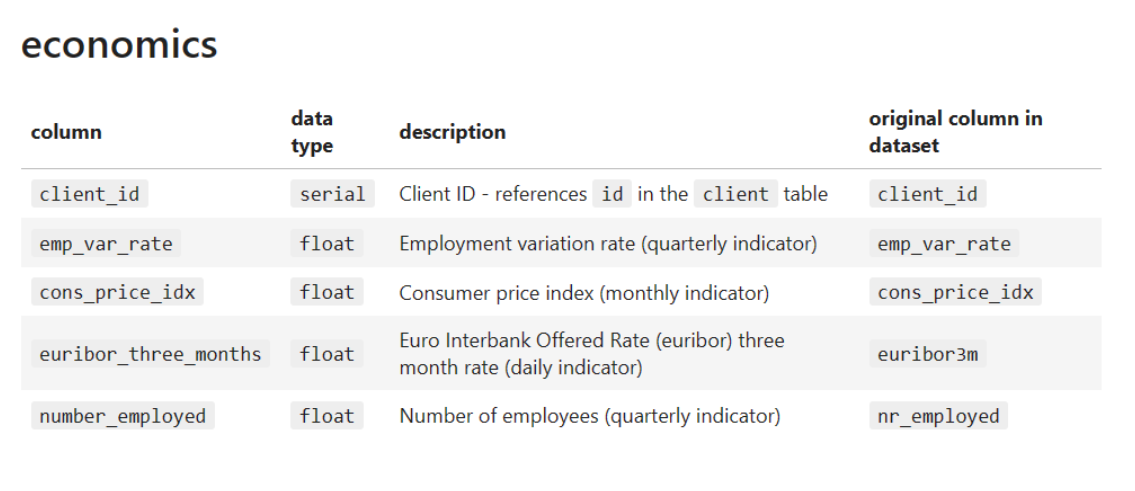

In [17]:
"""
Let us ckeck the dataframe. This will give us clue what has to be done
Luckly all column are correctly formatted (as per data type)
"""
economics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       41188 non-null  int64  
 1   emp_var_rate    41188 non-null  float64
 2   cons_price_idx  41188 non-null  float64
 3   euribor3m       41188 non-null  float64
 4   nr_employed     41188 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 1.6 MB


In [18]:
# let's rename a few colunms as per specification
economics_df.rename(columns={'euribor3m':'euribor_three_month', 
                             'nr_employed':'number_employed'}, 
                             inplace = True)

In [19]:
"""
Luckily the economics dataframe little need for cleaning, lets convert it to a CSV file
 using the .to_csv(client.csv)method.
 To ensure that the CSV file has only the column specified and no index column in the dataframe we will use 'index = false'
"""
economics_df.to_csv("Economics.csv", index=False)

### 6. REFORMATING AND CLEANING THE CAMPAIGN TABLE

1. Rename columns 
2. Change a column data type
3. Create a new 'last_contact_date' column
4. Save to a CSV file

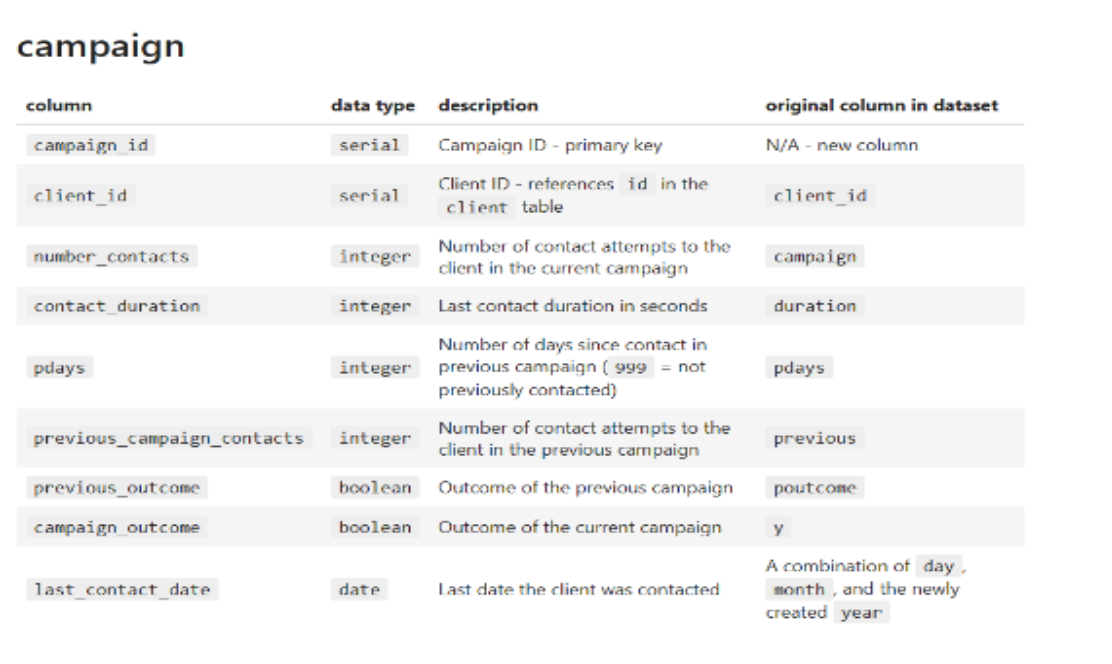

In [20]:
"""
Let us ckeck the dataframe. This will give us clue what has to be done
A few columns has to be renamed while, some columns data type will be changed to bool
A new column 'last_contact_date' will be created
"""
campaign_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  41188 non-null  int64 
 1   campaign   41188 non-null  int64 
 2   pdays      41188 non-null  int64 
 3   previous   41188 non-null  int64 
 4   poutcome   41188 non-null  object
 5   y          41188 non-null  object
 6   duration   41188 non-null  int64 
 7   month      41188 non-null  object
 8   day        41188 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.8+ MB


In [21]:
# Changing a few columns names as specified in the data dictionary
campaign_df.rename(columns={'campaign':'number_contacts',
                   'previous':'previous_campaign_contact',
                   'poutcome':'previous_outcome',
                   'y':'campaign_outcome',
                   'duration':'contact_duration'},
                   inplace = True)

In [22]:
#Changing the data type of the 'campaign_outcome' column to bool type 
campaign_df['campaign_outcome'] = campaign_df['campaign_outcome'].map({'yes': True, 'no': False})

In [23]:
campaign_df['previous_outcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [24]:
"""As there are only 3 unique values in the 'previous_contact' column, 
 and since boolean data types typically have two states,
 it's safe to convert 'nonexistent' to a Null value,
 indicating that no previous campaign was conducted for those rows.
"""

campaign_df.replace('nonexistent', np.nan, inplace=True)

In [25]:
campaign_df['previous_outcome'].unique()

array([nan, 'failure', 'success'], dtype=object)

In [26]:
#Changing the data type of the 'campaign_outcome' column to bool type 
campaign_df['previous_outcome'] = campaign_df['previous_outcome'].map({'success': True, 'failure': False})

In [27]:
# Map month abbreviations to their respective numerical values for better readability and analysis.
campaign_df['month'] = campaign_df['month'].map({'apr':4, 'aug':5, 'dec':12, 'jul':7, 'jun':6, 
                                                 'mar':3, 'may':5, 'nov':11, 'oct': 10, 'sep':9})

In [28]:

# Create the 'date' column by combining 'day', 'month', and 'year'
#Define a year variable
year = 2024
campaign_df['last_contact_date'] = pd.to_datetime(campaign_df.assign(year=year).loc[:, ['year', 'month', 'day']])

In [29]:
#drop the month and day column
del campaign_df['month']
del campaign_df['day']

In [30]:
campaign_df.to_csv("campaign.csv", index=False)